## Mineração de *Tweets*
Dados coletados durante o domingo (17/04/2015) de votação do Congresso para a continuação do processo de Impeachment da senhora Presidente Dilma Rousseff.


In [1]:
%matplotlib inline

import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# import nltk
import operator 
import os
import pandas as pd
# import pytz
import random
import re
# import seaborn as sns
import string
import sys
import time
import vincent

from collections import Counter
from collections import defaultdict
from datetime import datetime
from matplotlib import dates
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator
# from mpltools import style
# from nltk import FreqDist
# from nltk import bigrams 
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
from os import path
from pandas.tseries.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset
from scipy.misc import imread
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# nltk.download('punkt')
# nltk.download('mac_morpho')
# nltk.download('stopwords')

print 'OK!'

OK!


In [ ]:
# sns.set_palette("deep", desat=.6)
# sns.set_context(rc={"figure.figsize": (8, 4)})
# style.use('ggplot')
# rcParams['axes.labelsize'] = 9
# rcParams['xtick.labelsize'] = 9
# rcParams['ytick.labelsize'] = 9
# rcParams['legend.fontsize'] = 7
# rcParams['font.serif'] = ['Ubuntu']
# rcParams['font.size'] = 20
# rcParams['text.usetex'] = False
# rcParams['figure.figsize'] = 20, 10

print 'OK!'

In [ ]:
with open('data/small-data-fixed.json') as data_file:    
    data = json.load(data_file)

print 'OK!'

In [2]:
tweets_data_path = 'data/small-data.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print len(tweets_data)
print tweets_data[0]

358293
{u'contributors': None, u'truncated': False, u'text': u'RT @GringaBrazilien: Bom Dia Brasil, #ImpeachmentDay\nO n\xfamero da Beast \U0001f608 \xe9 3\u20e34\u20e32\u20e3\nO da Democracia \xe9 alegria infinita do povo Brasileiro \U0001f497 h\u2026', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 721718699565178880, u'favorite_count': 0, u'source': u'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', u'retweeted': False, u'coordinates': None, u'timestamp_ms': u'1460906121518', u'entities': {u'user_mentions': [{u'id': 2294780467, u'indices': [3, 19], u'id_str': u'2294780467', u'screen_name': u'GringaBrazilien', u'name': u'Gringa Brazilien'}], u'symbols': [], u'hashtags': [{u'indices': [37, 52], u'text': u'ImpeachmentDay'}], u'urls': [], u'media': [{u'source_user_id': 2294780467, u'source_status_id_str': u'721662403067428864', u'expanded_url': u'http://twitter.com/GringaBrazilien/status/721662403067428864/photo/1', u'display_url': u'pic.twitter.co

### Mineração estável

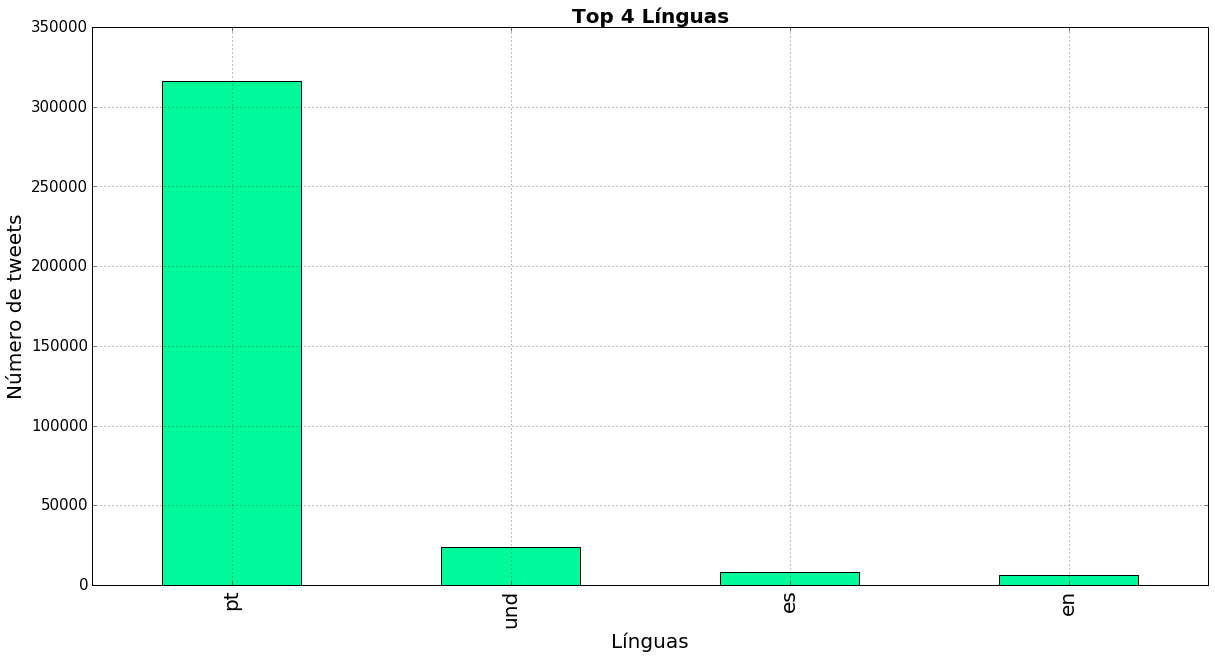

In [3]:
tweets = pd.DataFrame()

tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country']
                        if tweet['place'] != None else None, tweets_data)

tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Línguas'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 4 Línguas'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_lang[:4].plot(ax=ax, kind='bar', color='mediumspringgreen')
plt.grid()

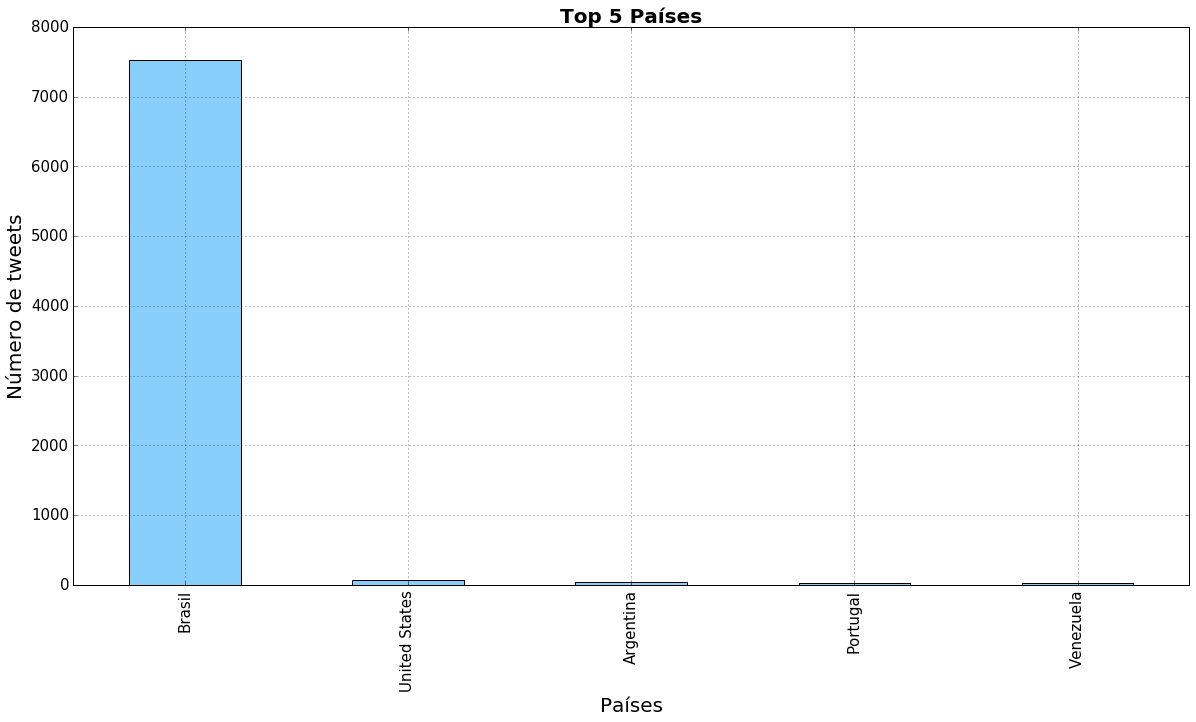

In [4]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Países'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 5 Países'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='lightskyblue')
plt.grid()

In [ ]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

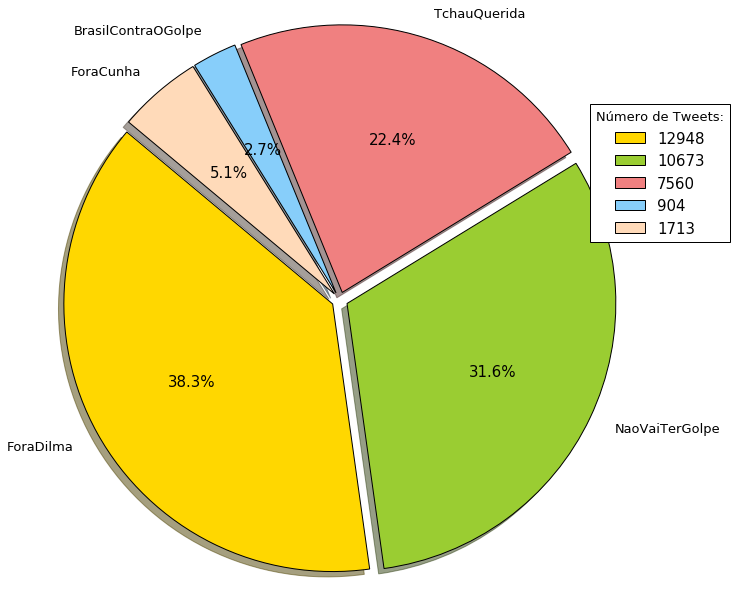

In [95]:
tweets['NaoVaiTerGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('NaoVaiTerGolpe', tweet))
tweets['TchauQuerida'] = tweets['text'].apply(lambda tweet: word_in_text('TchauQuerida', tweet))
tweets['ForaDilma'] = tweets['text'].apply(lambda tweet: word_in_text('ForaDilma', tweet))
tweets['BrasilContraOGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('BrasilContraOGolpe', tweet))
tweets['ForaCunha'] = tweets['text'].apply(lambda tweet: word_in_text('ForaCunha', tweet))

hashtags = ['ForaDilma', 'NaoVaiTerGolpe', 'TchauQuerida', 'BrasilContraOGolpe', 'ForaCunha']
tweets_by_hashtags = [tweets['ForaDilma'].value_counts()[True],
                      tweets['NaoVaiTerGolpe'].value_counts()[True],
                      tweets['TchauQuerida'].value_counts()[True],
                      tweets['BrasilContraOGolpe'].value_counts()[True],
                      tweets['ForaCunha'].value_counts()[True]]

plt.subplots(figsize=(10,10))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'peachpuff']
explode = (0.03, 0.03, 0.03, 0.03, 0.03)
plt.pie(tweets_by_hashtags, explode=explode, labels=hashtags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.rcParams['font.size'] = 13
plt.legend(tweets_by_hashtags, loc=(.95,.6), title='Número de Tweets:'.decode('utf-8'), fontsize=15)
plt.axis('equal')
plt.show()

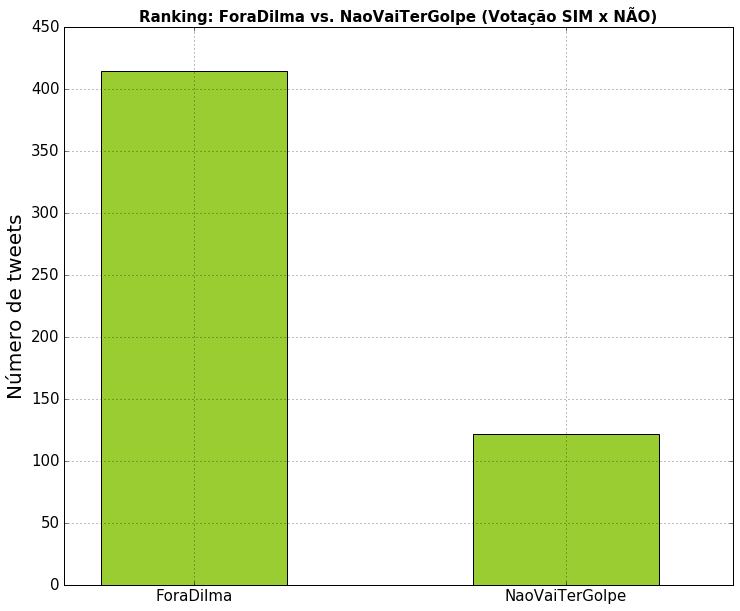

In [83]:
tweets['nao'] = tweets['text'].apply(lambda tweet: word_in_text(' nao ', tweet))
tweets['sim'] = tweets['text'].apply(lambda tweet: word_in_text(' sim ', tweet))

tweets['ImpeachmentDay'] = tweets['text'].apply(lambda tweet: word_in_text(' sim ', tweet) 
                                          or word_in_text(' nao ', tweet))

hashtags = ['ForaDilma', 'NaoVaiTerGolpe']
tweets_by_hashtags = [tweets[tweets['ImpeachmentDay'] == True]['ForaDilma'].value_counts()[True], 
                      tweets[tweets['ImpeachmentDay'] == True]['NaoVaiTerGolpe'].value_counts()[True]]


ind = np.arange(2)
width = 0.5
width2 = 0.3
x_pos = list(range(len(hashtags)))
fig, ax = plt.subplots(figsize=(12,10))
ax.bar(ind + width2, tweets_by_hashtags, width, color='yellowgreen')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel('Número de tweets'.decode('utf-8'), fontsize=20)
ax.set_title('Ranking: ForaDilma vs. NaoVaiTerGolpe (Votação SIM x NÃO)'.decode('utf-8'),
             fontsize=15, fontweight='bold')
ax.set_xticks([p + 1.1 * width for p in x_pos])
ax.set_xticklabels(hashtags)
plt.grid()

In [53]:
print tweets_by_hashtags

[414, 122]


In [84]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

tweets_relevant = tweets[tweets['ImpeachmentDay'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

print tweets_relevant_with_link[tweets_relevant_with_link['TchauQuerida'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ForaDilma'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ForaCunha'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['NaoVaiTerGolpe'] == True]['link']

8871      https://t.co/rtOavI9uQP
8906      https://t.co/VswJPAt5ul
9619      https://t.co/IiXU4ICRrH
9685      https://t.co/tlt3wTQ969
64182     https://t.co/Odd6HZPlJU
101356    https://t.co/6hOBQnYHhW
101573    https://t.co/nmY20txeMW
102084    https://t.co/9H9LU1CebE
102695    https://t.co/FdpW6olPVF
103954    https://t.co/brnPZh3Ruc
104091    https://t.co/h9SUq42jJp
105028    https://t.co/KQd41ZTwYW
105442    https://t.co/qZszc7jYNy
105724    https://t.co/I8Wv0IBzpe
106003    https://t.co/5HcF1xPBDj
110873    https://t.co/3f9crnn6Wl
112773    https://t.co/3f9crnn6Wl
116954    https://t.co/Xw8EDpB6Vp
117108    https://t.co/cjGcnmCN8J
118773    https://t.co/26T3oPIREo
119310    https://t.co/6qYZPS4ch6
119883    https://t.co/nv8TuAkWag
120311    https://t.co/f8Q8NWD5dG
120597    https://t.co/koeOCI7qwa
120850    https://t.co/sc82GUHdHp
121499    https://t.co/syaigshcm6
123385    https://t.co/eGTNFuNDMh
124877    https://t.co/dbn3M31GhS
125940    https://t.co/6jivJOttkw
128092    http

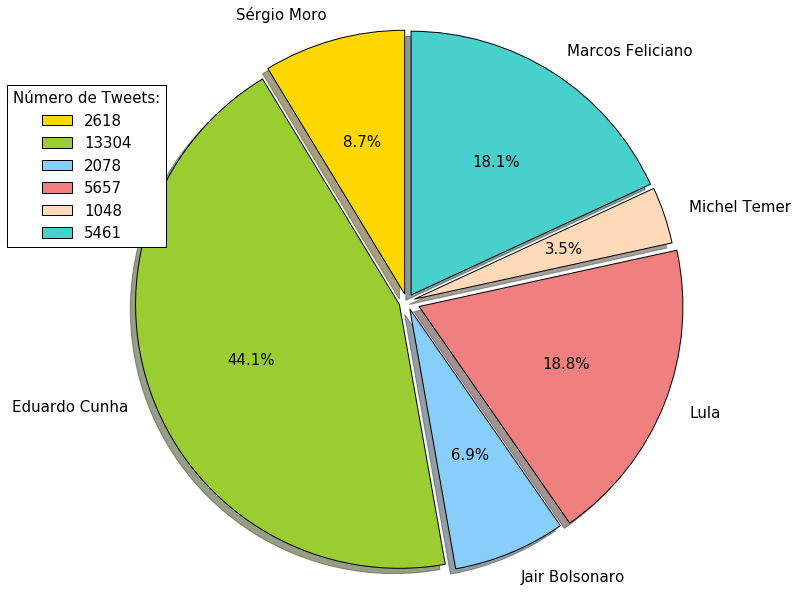

In [94]:
tweets['moro'] = tweets['text'].apply(lambda tweet: word_in_text('moro', tweet))
tweets['cunha'] = tweets['text'].apply(lambda tweet: word_in_text('cunha', tweet))
tweets['bolsonaro'] = tweets['text'].apply(lambda tweet: word_in_text('bolsonaro', tweet))
tweets['lula'] = tweets['text'].apply(lambda tweet: word_in_text('lula', tweet))
tweets['temer'] = tweets['text'].apply(lambda tweet: word_in_text('temer', tweet))
tweets['feliciano'] = tweets['text'].apply(lambda tweet: word_in_text('feliciano', tweet))

hashtags = ['Sérgio Moro'.decode('utf-8'), 'Eduardo Cunha', 'Jair Bolsonaro', 'Lula', 'Michel Temer', 'Marcos Feliciano']
tweets_by_hashtags = [tweets['moro'].value_counts()[True],
                      tweets['cunha'].value_counts()[True],
                      tweets['bolsonaro'].value_counts()[True],
                      tweets['lula'].value_counts()[True],
                      tweets['feliciano'].value_counts()[True],
                      tweets['temer'].value_counts()[True]]

plt.subplots(figsize=(10,10))
colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral', 'peachpuff', 'mediumturquoise']
explode = (0.03, 0.03, 0.03, 0.05, 0.03, 0.03)
plt.pie(tweets_by_hashtags, explode=explode, labels=hashtags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.rcParams['font.size'] = 15
# plt.legend(tweets_by_hashtags, loc='best')
plt.legend(tweets_by_hashtags, loc=(-.22,.6), title='Número de Tweets:'.decode('utf-8'), fontsize=15)
plt.axis('equal')
plt.show()

### Horário

In [ ]:
tweets['created_at'] = pd.to_datetime(pd.Series(tweets['created_at']))

tweets.set_index('created_at', drop=False, inplace=True)

tweets.index = tweets.index.tz_localize('GMT')
tweets.index = tweets.index - DateOffset(hours = 3)
tweets.index

tweets.head()

In [ ]:
tweets30s = tweets['created_at'].resample('1h', how='count')
tweets30s.head()

In [ ]:
avg = tweets30s.mean()

vincent.core.initialize_notebook()
area = vincent.Area(tweets30s)
area.colors(brew='Spectral')
area.display()

### Mapa

In [ ]:
tweets = pd.read_json("data/small-data-fixed.json")
print 'OK!'
type(tweets)

In [ ]:
tweets.info()

In [ ]:
coordinate = []
for col in tweets['coordinates'][~tweets['coordinates'].isnull()]:
    coord = col['coordinates'][::-1]
    coordinate.append(coord)
    
print coordinate[10]

In [ ]:
coord_text = []
for col in tweets['text'][~tweets['coordinates'].isnull()]:
    coord = col.encode('utf-8')
    coord_text.append(coord)
    
print coord_text[10]

In [ ]:
tweets[['coordinates','text']][~tweets['coordinates'].isnull()].head(11)

In [ ]:
coords = tweets['coordinates']
coords = coords[~coords.isnull()]
coords = coords.apply(lambda d: d['coordinates'][::-1])
coords.head(20)

In [ ]:
m = folium.Map([-14,-53.25], zoom_start=4)

for x, text in enumerate(coord_text):
    folium.Marker(coordinate[x], popup=str(coordinate[x])).add_to(m)

m

In [ ]:
tweets.text.head()

In [ ]:
tweets.user.head()

In [ ]:
df = pd.DataFrame()
df['text'] = tweets['text']
df['coordinates'] = tweets['coordinates']
df['user'] = tweets['user']
df.head()


# df['text'] = map(lambda df: df['text'].encode('utf-8'), tweets)
# df['user'] = map(lambda df: df['user']['screen_name'], tweets)

* * *
* * *

### Testando outras formas de plots e *wordcloud*

In [ ]:
tweets['created_at'] = map(lambda tweet: time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')), tweets_data)
tweets['user'] = map(lambda tweet: tweet['user']['screen_name'], tweets_data)
tweets['user_followers_count'] = map(lambda tweet: tweet['user']['followers_count'], tweets_data)
tweets['retweet_count'] = map(lambda tweet: tweet['retweet_count'], tweets_data)
tweets['favorite_count'] = map(lambda tweet: tweet['favorite_count'], tweets_data)

tweets['text'] = map(lambda tweet: tweet['text'].encode('utf-8'), tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['Location'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

tweets.head()

In [ ]:
list_of_original_tweets = [element for element in tweets['text'].values if not element.startswith('RT')]
print list_of_original_tweets[0]

print "Numero de Tweets originais : " + str(len(list_of_original_tweets))

list_of_retweets = [element for element in tweets['text'].values if element.startswith('RT')]
print "Numero de Retweets : " + str(len(list_of_retweets))

In [ ]:
plot_tweets_per_category(tweets['user'], 
                             "#ImpeachmentDay usuarios ativos", 
                             "Usuarios", 
                             "Numero de Tweets", 20,
                             "ImpeachmentDay_users.png")


In [ ]:
def plot_distribution(category, title, x_title, y_title, output_filename="plot.png"):
        fig, ax = plt.subplots()
        ax.tick_params(axis='x')
        ax.tick_params(axis='y')
        ax.set_xlabel(x_title)
        ax.set_ylabel(y_title)
        ax.set_title(title)
        sns.distplot(category.values, rug=True, hist=True);
        fig.savefig(output_filename)


plot_distribution(tweets['retweet_count'], 
                      "#ImpeachmentDay distribuicao de Retweets", "", "",
                      "retweets_distribution.png")

In [ ]:
df = pd.DataFrame(tweets['created_at'].value_counts(), columns=['number_tweets'])
df['date'] = df.index
df.head()

days = [item.split(" ")[0] for item in df['date'].values]
df['days'] = days
grouped_tweets = df[['days', 'number_tweets']].groupby('days')
tweet_growth = grouped_tweets.sum()
tweet_growth['days']= tweet_growth.index

tweet_growth

In [ ]:
import numpy as np
fig = plt.figure()
ax = plt.subplot(111)
x_pos = np.arange(len(tweet_growth['days'].values))
ax.bar(x_pos, tweet_growth['number_tweets'].values, align='center')
ax.set_xticks(x_pos)
ax.set_title('#ImpeachmentDay hashtag growth')
ax.set_ylabel("number tweets")
ax.set_xticklabels(tweet_growth['days'].values)
fig.savefig('ImpeachmentDay.png')

In [ ]:
text = " ".join(tweets['text'].values.astype(str))

no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(background_color="white", max_words=2000,
                      stopwords=STOPWORDS, width=1800, height=1400).generate(no_urls_no_tags)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
text = " ".join(tweets['text'].values.astype(str))

no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

tweet_coloring = imread(path.join("dilma2.png"))

wc = WordCloud(background_color="white", max_words=2000, mask=tweet_coloring,
               stopwords=STOPWORDS, max_font_size=40, random_state=42)

wc.generate(no_urls_no_tags)

image_colors = ImageColorGenerator(tweet_coloring)
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.savefig('mozsprint.png', dpi=300)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()
plt.imshow(tweet_coloring, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

* * *
* * *